In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
import re
import yaml

# Format rubric file

In [45]:
def load_rubric(filename: str):
    with open(filename, 'r') as file:
        rubric = yaml.safe_load(file)
    return rubric

In [46]:
rubric_section_map = {
    'Description': 'Project Description / Purpose',
    'Overview': 'Project Overview',
    'Timeline': 'Timeline',
    'Scope': 'Project Scope',
    'Team': 'Project Team',
}

In [81]:
inv_rubric_section_map = {v: k for k, v in rubric_section_map.items()}

In [47]:
rubric_file = load_rubric('../Prompts/rubric.yaml')
rubric_file

{'Project Description / Purpose': {'criteria': [{'name': "Question 1. Does the value of the 'Project Name:' attribute exist in the file?",
    'grade_range': '0-2'},
   {'name': "Question 2. Does the value of the 'Clinic:' attribute exist in the file?",
    'grade_range': '0-2'},
   {'name': "Question 3. Does the value of the 'Process:' attribute exist in the file?",
    'grade_range': '0-2'},
   {'name': "Question 4. Does the value of the 'TIP 2.0 Process Milestone:' attribute exist in the file?",
    'grade_range': '0-2'},
   {'name': "Question 5. Does the value of the 'TIP 2.0 Process Milestone:' attribute provide specific process milestone details?",
    'grade_range': '0-2'},
   {'name': "Question 6. Does the value of the 'Project Description / Purpose' attribute include a brief description of the project?",
    'grade_range': '0-5'},
   {'name': "Question 7. Does the value of the 'Project Description / Purpose' attribute include a sentence that explicitly state the aims or purpos

# Visualize result df

In [4]:
result_df = pd.read_csv('../Documents/Results/result.csv').dropna()
result_df

,File Name,Project Description / Purpose Total Score,Project Description / Purpose Overall Description,Project Overview Total Score,Project Overview Overall Description,Timeline Total Score,Timeline Overall Description,Project Scope Total Score,Project Scope Overall Description,Project Team Total Score,Project Team Overall Description,Document Total Score
0,input1,12.0,The 'Project Description / Purpose' section pr...,21.0,The Project Overview section is well-structure...,17.0,The timeline section is well-organized and pro...,8.0,The 'Project Scope' section demonstrates a str...,9.0,"The project team report has some strengths, su...",67
1,input2,17.0,The 'Project Description / Purpose' section is...,22.0,The Project Overview section is well-structure...,19.0,The 'Timeline' section of the report is well-o...,10.0,The report provides a good foundation for unde...,6.0,"The project team section has some strengths, s...",74
2,input3,12.0,The 'Project Description / Purpose' section pr...,19.0,The project overview section provides a good f...,19.0,The 'Timeline' section of the project report i...,8.0,The report demonstrates a clear understanding ...,8.0,"The project team section has some strengths, s...",66
3,input4,12.0,The 'Project Description / Purpose' section pr...,19.0,The project overview section provides a good f...,19.0,The 'Timeline' section of the project report i...,8.0,The report demonstrates a clear understanding ...,8.0,"The project team section has some strengths, s...",66
4,input5,10.0,The report provides a good overview of the pro...,21.0,The Project Overview section provides a good f...,19.0,The 'Timeline' section of the report is well-o...,14.0,The 'Project Scope' section of the report effe...,9.0,"The project team section has some strengths, s...",73
5,input6,17.0,The 'Project Description / Purpose' section is...,21.0,The Project Overview section provides a good f...,19.0,The 'Timeline' section of the project report i...,14.0,"The project scope is well-defined, with clear ...",9.0,The project report's 'Project Team' section ge...,80
6,input7,12.0,The report provides a good overview of the pro...,24.0,The Project Overview section demonstrates good...,19.0,The project report's timeline section is well-...,8.0,The report meets expectations for 'In Scope Pr...,9.0,The project report has a strong start with cle...,72
7,input8,17.0,The 'Project Description / Purpose' section is...,21.0,The Project Overview section meets most of the...,19.0,The 'Timeline' section of the report is well-o...,15.0,The 'Project Scope' section demonstrates a cle...,9.0,The project report has a strong start with cle...,81
8,input9,12.0,The 'Project Description / Purpose' section pr...,21.0,The Project Overview section provides a good f...,17.0,The timeline section is generally well-organiz...,15.0,The project report provides clear and well-def...,9.0,The project report provides some information a...,74
9,input10,12.0,The 'Project Description / Purpose' section pr...,24.0,The Project Overview section is well-structure...,19.0,The timeline section of the report is well-org...,14.0,The 'Project Scope' section is well-structured...,9.0,The project report has a strong start with cle...,78


In [5]:
# Select the score columns
score_columns = [col for col in result_df.columns if ('score' in col.lower() and 'document' not in col.lower())]  # Add more columns if needed

# Plot the score columns
temp = result_df.copy()
melted_df = temp.melt(id_vars=['File Name'], value_vars=score_columns, var_name='Score Type', value_name='Score')

# Create the plot
fig = px.line(melted_df, x='File Name', y='Score', color='Score Type', title='Score Columns Visualization')

# Show the plot
fig.show()

# Format df to visualize performance

In [21]:
keep_cols = [col for col in result_df.columns if ('score' in col.lower() and 'document' not in col.lower())]
keep_cols.append('File Name')
score_result_df = result_df[keep_cols]
score_result_df

,Project Description / Purpose Total Score,Project Overview Total Score,Timeline Total Score,Project Scope Total Score,Project Team Total Score,File Name
0,12.0,21.0,17.0,8.0,9.0,input1
1,17.0,22.0,19.0,10.0,6.0,input2
2,12.0,19.0,19.0,8.0,8.0,input3
3,12.0,19.0,19.0,8.0,8.0,input4
4,10.0,21.0,19.0,14.0,9.0,input5
5,17.0,21.0,19.0,14.0,9.0,input6
6,12.0,24.0,19.0,8.0,9.0,input7
7,17.0,21.0,19.0,15.0,9.0,input8
8,12.0,21.0,17.0,15.0,9.0,input9
9,12.0,24.0,19.0,14.0,9.0,input10


In [56]:
df_melted = score_result_df.melt(id_vars='File Name', 
                    value_vars=[col for col in score_result_df.columns if 'score' in col.lower()], 
                    var_name='section', 
                    value_name='section_score')
df_melted = df_melted.sort_values(by='File Name').reset_index(drop=True)
df_melted['section'] = df_melted['section'].str.replace(' Total Score', '', regex=False)
df_melted['section_score'] = df_melted.apply(lambda row: 1 if row['section_score'] >= rubric_file[row['section']]['threshold'] else 0, axis=1)
df_melted

,File Name,section,section_score
0,input1,Project Description / Purpose,1
1,input1,Project Scope,1
2,input1,Timeline,1
3,input1,Project Team,1
4,input1,Project Overview,1
...,...,...,...
70,input9,Project Description / Purpose,1
71,input9,Project Team,1
72,input9,Project Overview,1
73,input9,Timeline,1


In [82]:
y_test = df_melted.copy()
y_test['section'] = y_test['section'].replace(inv_rubric_section_map)
y_test

,File Name,section,section_score
0,input1,Description,1
1,input1,Scope,1
2,input1,Timeline,1
3,input1,Team,1
4,input1,Overview,1
...,...,...,...
70,input9,Description,1
71,input9,Team,1
72,input9,Overview,1
73,input9,Timeline,1


In [84]:
y_true = pd.read_csv('y_test_df.csv', index_col=0)
# y_true['Section'] = y_true['Section'].replace(rubric_section_map)
y_true['filename'] = y_true['filename'].str.replace('.txt', '', regex=False)
y_true = y_true.map(lambda x: 'input1' if x == "input" else x)
y_true

,filename,Section,pass_Real
0,input1,Description,1
1,input1,Overview,1
2,input1,Scope,1
3,input1,Team,1
4,input1,Timeline,1
...,...,...,...
70,input9,Description,0
71,input9,Overview,1
72,input9,Scope,0
73,input9,Team,1


In [86]:
merged_df = pd.merge(y_true, y_test, left_on=['filename', 'Section'], right_on=['File Name', 'section'])
merged_df = merged_df.drop(columns=['File Name', 'section'])
merged_df = merged_df.rename(columns={
    'filename': 'filename',
    'section_score': 'pass_AI',
    'Section': 'Section',
    'pass_Real': 'pass_Real'
})
merged_df = merged_df[['filename', 'Section', 'pass_AI', 'pass_Real']]
merged_df

,filename,Section,pass_AI,pass_Real
0,input1,Description,1,1
1,input1,Overview,1,1
2,input1,Scope,1,1
3,input1,Team,1,1
4,input1,Timeline,1,1
...,...,...,...,...
70,input9,Description,1,0
71,input9,Overview,1,1
72,input9,Scope,1,0
73,input9,Team,1,1


# Visualize performance

In [79]:
from visualizeResult import ModelResultAnalyzer

Accuracy: 0.72
Precision: 0.70
Recall: 0.98
F1 score: 0.81
[[ 8 20]
 [ 1 46]]


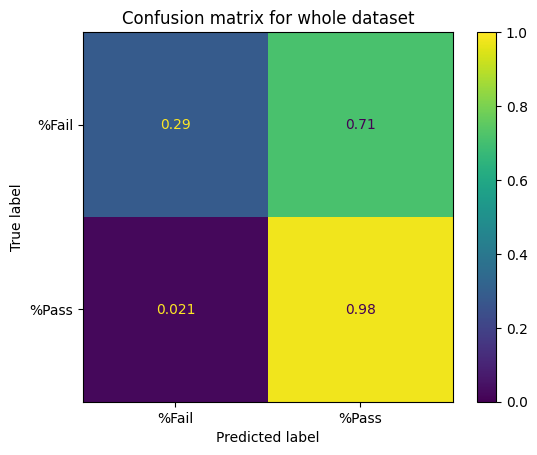

There are 15 Descriptions in 15 submissions
9 Description failed
6 Description passed
Accuracy: 0.40
Precision: 0.38
Recall: 0.83
F1 score: 0.53


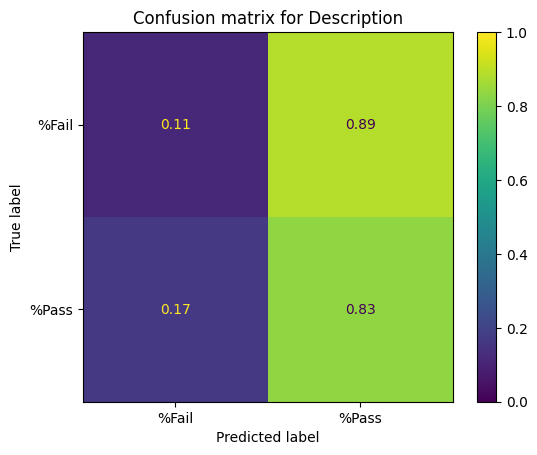

There are 15 Overviews in 15 submissions
4 Overview failed
11 Overview passed
Accuracy: 0.73
Precision: 0.73
Recall: 1.00
F1 score: 0.85


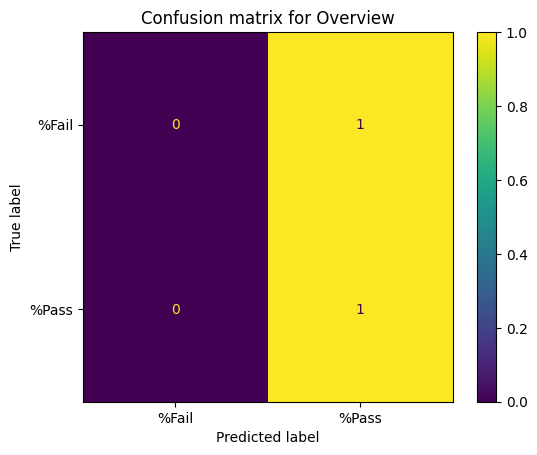

There are 15 Scopes in 15 submissions
4 Scope failed
11 Scope passed
Accuracy: 0.80
Precision: 0.79
Recall: 1.00
F1 score: 0.88


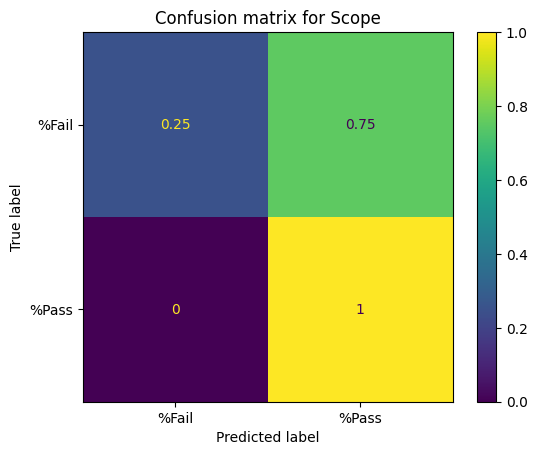

There are 15 Teams in 15 submissions
6 Team failed
9 Team passed
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


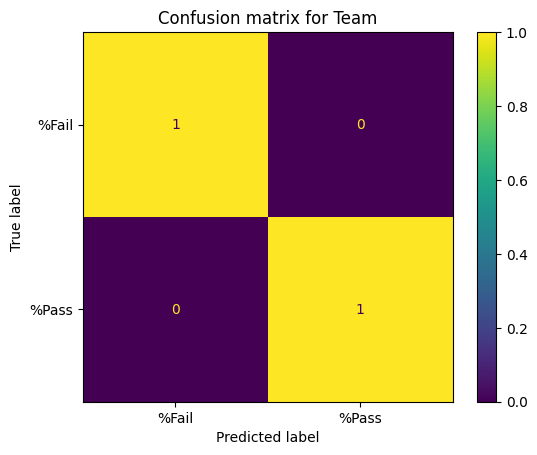

There are 15 Timelines in 15 submissions
5 Timeline failed
10 Timeline passed
Accuracy: 0.67
Precision: 0.67
Recall: 1.00
F1 score: 0.80


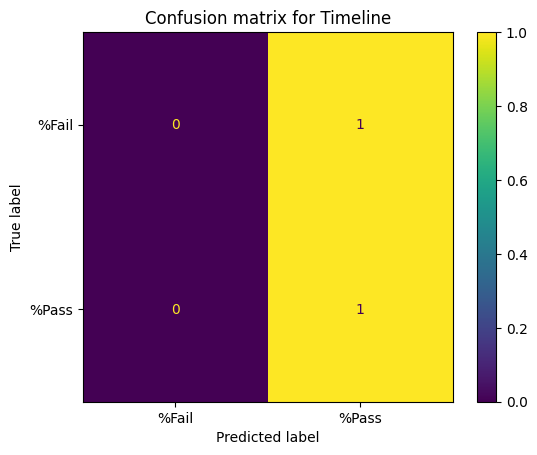

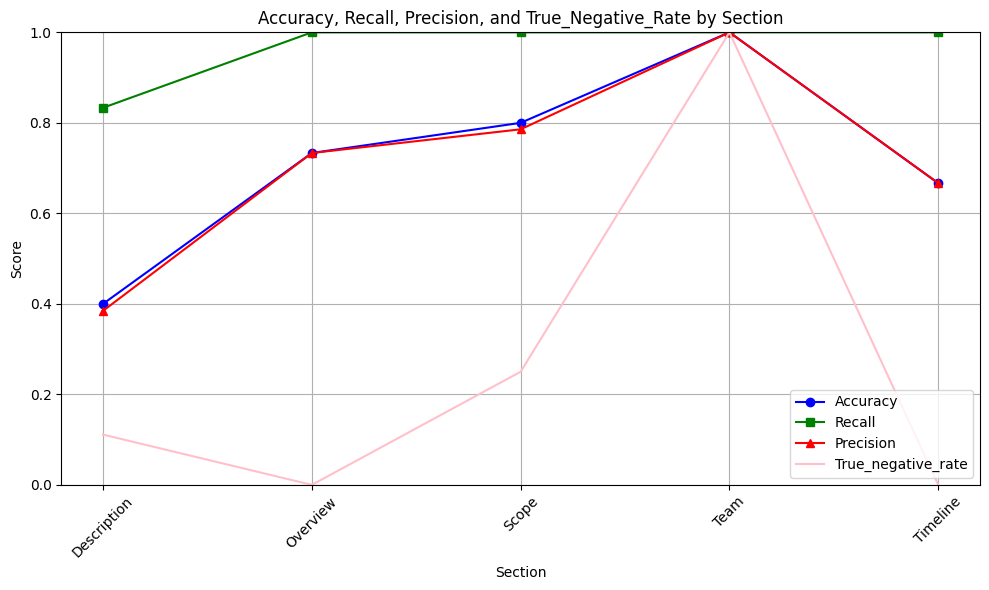

In [87]:
test_result_section = ModelResultAnalyzer(merged_df)
test_result_section.plot_confusion_matrix()
test_result_section.visualize_all_sections()